In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import copy
import re
import os
import matplotlib.pyplot as plt
from Bio.SeqIO.FastaIO import FastaIterator
from collections import Counter

In [3]:
df = pd.read_csv("../datas/600_04_02_011_5_500_0005_5e-04/data/chromosomes_contacts.csv", header=0, sep=",")
df = df.drop(df.columns[[0, 1]], axis=1)
df.head()

,length,chr1_1_10001,chr1_10001_20001,chr1_20001_30001,chr1_30001_40001,chr1_40001_50001,chr1_50001_60001,chr1_60001_70001,chr1_70001_80001,chr1_80001_90001,...,chr16_850001_860001,chr16_860001_870001,chr16_870001_880001,chr16_880001_890001,chr16_890001_900001,chr16_900001_910001,chr16_910001_920001,chr16_920001_930001,chr16_930001_940001,chr16_940001_948067
0,500,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,500,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,500,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,500,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,500,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df500 = df[df["length"]== 500].iloc[:, 1:]
df500.index = range(600)
df1000 = df[df["length"]== 1000].iloc[:, 1:]
df1000.index = range(600)
df2000 = df[df["length"]== 2000].iloc[:, 1:]
df2000.index = range(600)

In [5]:
chr_vline = []
for i,v in enumerate(df2000.columns):
    if (v.split("_")[1] == '1'):
        chr_vline.append(i)
chr_vline

[0, 23, 105, 137, 291, 349, 376, 486, 543, 587, 662, 729, 837, 930, 1009, 1119]

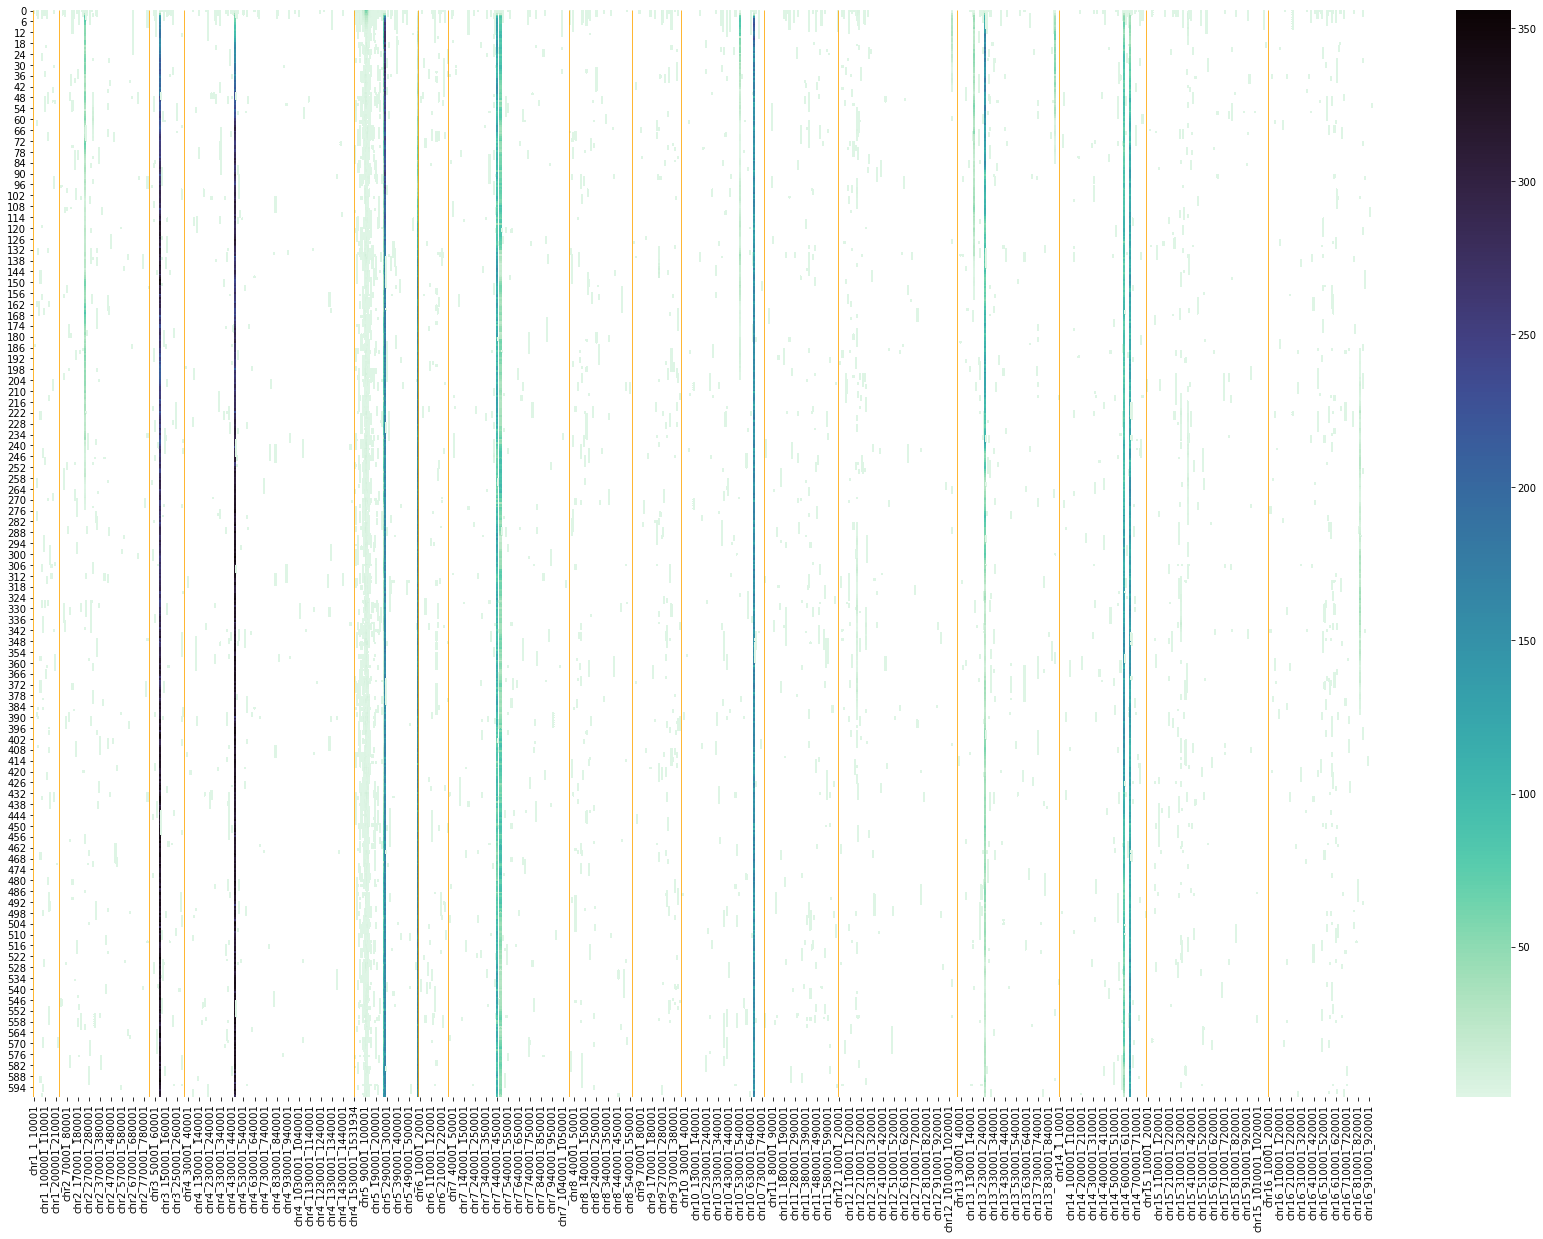

In [6]:
plt.figure(figsize = (30,20))
df2000_filtered = copy.deepcopy(df2000)
df2000_filtered[df2000 < 1 ]= np.nan
sns.color_palette("mako", as_cmap=True)
ax = sns.heatmap(df2000_filtered, cmap = "mako_r")
ax.vlines(chr_vline, *ax.get_xlim(), color="orange", alpha = 0.8, linewidth =1)
plt.savefig("../datas/chr_contacts_heatmap.jpg")
plt.show()